In [31]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [6]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
Scalder = StandardScaler()  

In [8]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(Scalder.fit_transform(df_market_data), columns=df_market_data.columns) 

# Copy the crypto names from the original DataFrame
df_market_data_scaled.insert(0, "coin_id", df_market_data.index)

# Set the coin_id column as index
df_market_data_scaled.set_index("coin_id", inplace=True)

# Display the scaled DataFrame
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [9]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [10]:
# Create an empty list to store the inertia values
interia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(df_market_data_scaled)
    interia.append(model.inertia_)
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list


In [11]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": interia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [12]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k_values,
    width=800,
    height=400
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** k=4


---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [13]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=0)

In [14]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_market_data_scaled)

KMeans(n_clusters=4, random_state=0)

In [15]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_values = kmeans.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(cluster_values)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [16]:
# Create a copy of the scaled DataFrame
df_market_data_clustered = df_market_data_scaled.copy()

In [17]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_data_clustered["class"] = kmeans.labels_  

# Display the copy of the scaled DataFrame
df_market_data_clustered.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,class
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [18]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
# Plot each cluster separately to control colors
# Create the scatter plot using hvPlot
scatter_plot = df_market_data_clustered.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="class",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clustering by Price Changes",
    width=800,
    height=500
)

# Display the plot
scatter_plot


:NdOverlay   [class]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [19]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [20]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(df_market_data_scaled)
df_pca = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"], index=df_market_data_clustered.index)

# View the scaled PCA data
display(df_pca.head())


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [21]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is 88.58%. This means that these three components capture approximately 88.6% of the variance in the original dataset

In [26]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"])

# Copy the crypto names from the original scaled DataFrame
df_pca.insert(0, "coin_id", df_market_data_clustered.index)

# Set the coin_id column as index
df_pca.set_index("coin_id", inplace=True)

# Display the scaled PCA DataFrame
df_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [27]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [47]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(df_pca)
    inertia_values.append(kmeans.inertia_)  

In [48]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

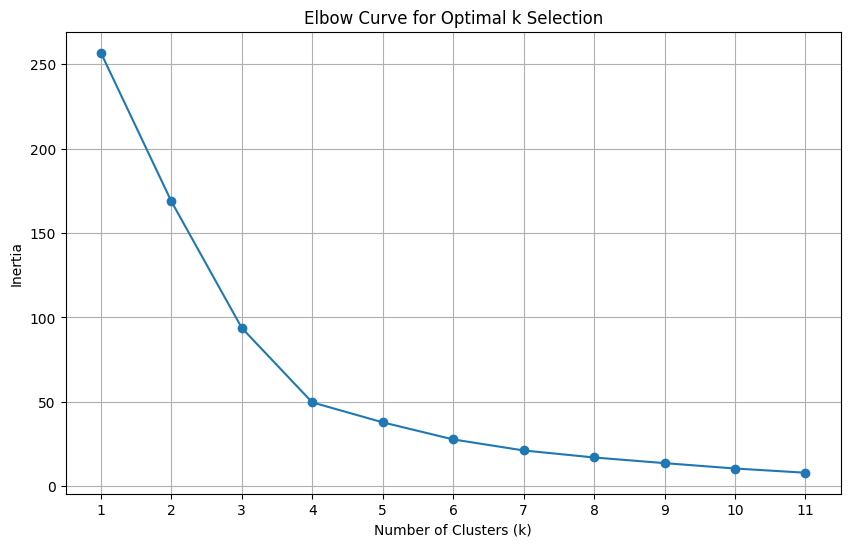

In [32]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve for Optimal k Selection")
plt.xticks(k_values)
plt.grid(True)

# Show the plot
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**k=4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** The best k-value for both the original data and the PCA-transformed data appears to be 2 based on the Elbow Curve analysis.

This suggests that PCA did not significantly change the optimal clustering structure in this case. However, PCA still helps by reducing dimensionality, making computations more efficient.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [33]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=0, n_init=10)

In [34]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(df_pca)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [35]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
cluster_values_pca = kmeans_pca.predict(df_pca)

# Print the resulting array of cluster values.
print("Cluster Assignments:", cluster_values_pca)

Cluster Assignments: [2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [36]:
# Create a copy of the scaled PCA DataFrame
df_pca_clustered = df_pca.copy()
# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_clustered["cluster"] = cluster_values_pca

# Display the copy of the scaled PCA DataFrame
df_market_data_clustered.head() 

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,class
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [37]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = df_pca_clustered.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clustering using PCA (k=4)",
    width=800,
    height=500
)

# Display the plot
scatter_plot

:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

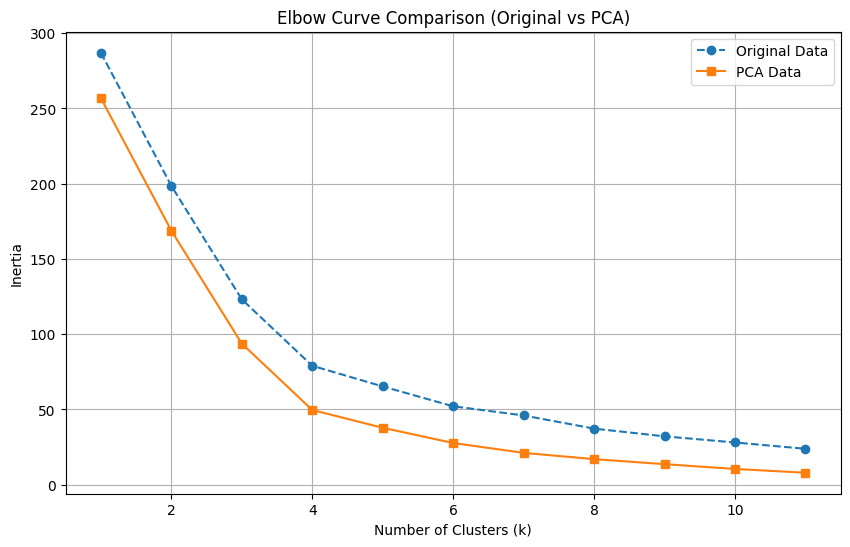

In [49]:
# Apply PCA with n_components=3
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df_market_data_scaled)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"], index=df_market_data.index)

# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Compute inertia for original data
inertia_values_original = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(df_market_data_scaled)
    inertia_values_original.append(kmeans.inertia_)

# Compute inertia for PCA-transformed data
inertia_values_pca = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(df_pca)
    inertia_values_pca.append(kmeans.inertia_)

# Create the Elbow Curve DataFrame
df_elbow = pd.DataFrame({
    "k": k_values,
    "inertia_pca": inertia_values_pca,
    "inertia_original": inertia_values_original
})

# Generate the Elbow Curve comparison plot
plt.figure(figsize=(10, 6))

# Plot the Elbow Curve for the original data
plt.plot(df_elbow["k"], df_elbow["inertia_original"], marker="o", linestyle="--", label="Original Data")

# Plot the Elbow Curve for the PCA-transformed data
plt.plot(df_elbow["k"], df_elbow["inertia_pca"], marker="s", linestyle="-", label="PCA Data")

# Labels and title
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve Comparison (Original vs PCA)")

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

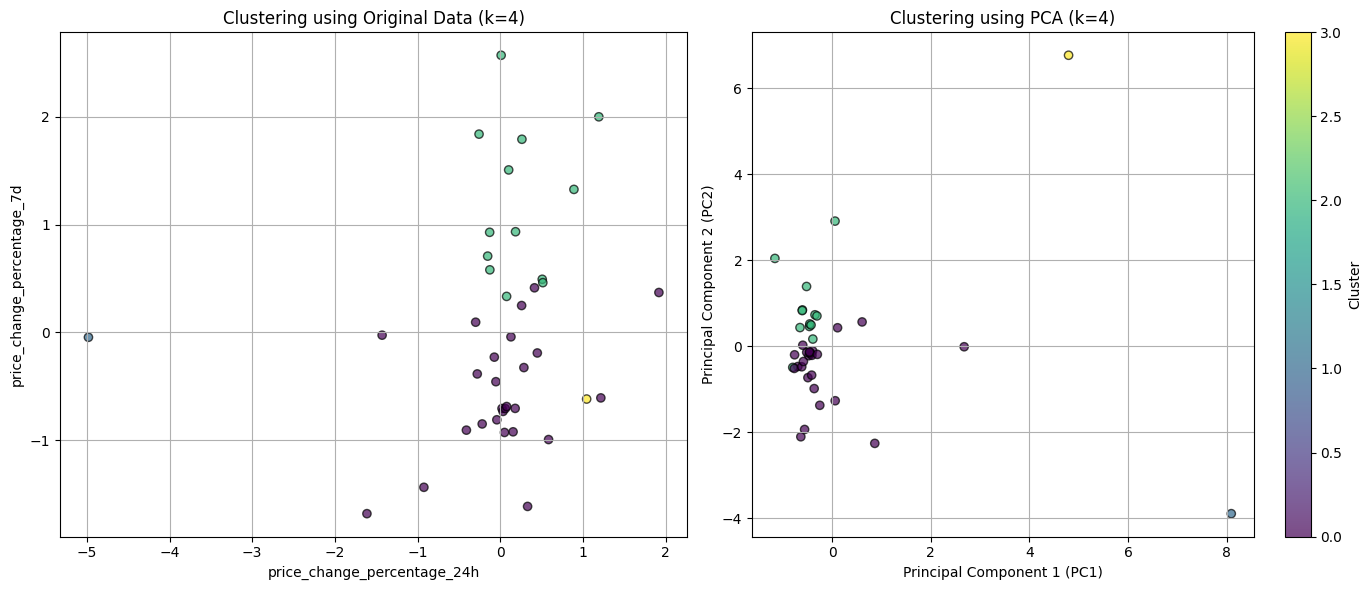

In [50]:
# Composite plot to contrast the clusters
# Perform clustering on both original and PCA-transformed data using k=4 (best k found earlier)
kmeans_original = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans_pca = KMeans(n_clusters=4, random_state=0, n_init=10)

# Fit K-Means models
df_market_data_scaled["cluster"] = kmeans_original.fit_predict(df_market_data_scaled)
df_pca["cluster"] = kmeans_pca.fit_predict(df_pca)

# Create scatter plots for both original and PCA-transformed clustering results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for original data (using first two features for visualization)
axes[0].scatter(
    df_market_data_scaled.iloc[:, 0], df_market_data_scaled.iloc[:, 1],
    c=df_market_data_scaled["cluster"], cmap="viridis", edgecolor="black", alpha=0.7
)
axes[0].set_xlabel(df_market_data.columns[0])
axes[0].set_ylabel(df_market_data.columns[1])
axes[0].set_title("Clustering using Original Data (k=4)")
axes[0].grid(True)

# Scatter plot for PCA-transformed data
scatter = axes[1].scatter(
    df_pca["PC1"], df_pca["PC2"],
    c=df_pca["cluster"], cmap="viridis", edgecolor="black", alpha=0.7
)
axes[1].set_xlabel("Principal Component 1 (PC1)")
axes[1].set_ylabel("Principal Component 2 (PC2)")
axes[1].set_title("Clustering using PCA (k=4)")
axes[1].grid(True)

# Add color bar for PCA clustering
cbar = plt.colorbar(scatter, ax=axes[1])
cbar.set_label("Cluster")

# Adjust layout for readability
plt.tight_layout()

# Show the plots
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**K-Means performs better when features are uncorrelated, but real-world datasets often contain correlated data.
PCA removes correlation among features, making K-Means more effective.
As a result, clusters in the PCA-transformed data may be more compact and better separated.